## 소비자 데이터 기반 소비 예측 경진대회

1. train.csv : 학습 데이터
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량


2. test.csv : 테스트 데이터

3. sample_submission.csv : 제출 양식
- id : 샘플 아이디
- target : 고객의 제품 총 소비량

4. 평가지표 NMAE

```python
import numpy as np

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score
```

## 설치 패키지

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=23103297fdbe38ef669daba7662cccbe50e2d89000d4eebd66787172bcdc0eb9
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
!pip install CatBoost

     |████████████████████████████████| 76.6 MB 43 kB/s 


In [ ]:
!pip install pycaret

     |████████████████████████████████| 320 kB 3.8 MB/s 
     |████████████████████████████████| 1.7 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 16.8 MB 50.4 MB/s 
     |████████████████████████████████| 262 kB 50.4 MB/s 
     |████████████████████████████████| 167 kB 56.8 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 6.8 MB 37.5 MB/s 
     |████████████████████████████████| 118 kB 73.5 MB/s 
     |████████████████████████████████| 2.0 MB 49.6 MB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
     |████████████████████████████████| 10.9 MB 38.4 MB/s 
     |████████████████████████████████| 690 kB 49.2 MB/s 
     |████████████████████████████████| 102 kB 12.0 MB/s 
     |████████████████

## Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

import warnings
warnings.filterwarnings('ignore')

import os
import itertools
import multiprocessing

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR, LinearSVR

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from catboost import CatBoostRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from glob import glob
from scipy.stats import chi2_contingency, kstest
from statsmodels.formula.api import ols

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

## 데이터 구조

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-null   i

In [ ]:
train.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [ ]:
train.head(5).transpose()

,0,1,2,3,4
Year_Birth,1974,1962,1951,1974,1946
Education,Master,Graduation,Graduation,Basic,PhD
Marital_Status,Together,Single,Married,Married,Together
Income,46014.0,76624.0,75903.0,18393.0,64014.0
Kidhome,1,0,0,1,2
Teenhome,1,1,1,0,1
Dt_Customer,21-01-2013,24-05-2014,08-04-2013,29-03-2014,10-06-2014
Recency,21,68,50,2,56
NumDealsPurchases,10,1,2,2,7
NumWebPurchases,7,5,6,3,8


In [ ]:
print(train.shape)
print(test.shape)

(1108, 21)
(1108, 20)


## 결측치

In [ ]:
train.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

## Date형 변수 전처리
- `Dt_Customer` 컬럼이 object형으로 되어있으므로 int형으로 변경 필요

In [ ]:
train['Dt_Customer'] = pd.to_datetime(train['Dt_Customer'])
train['year'] = train['Dt_Customer'].dt.year
train['month'] = train['Dt_Customer'].dt.month
train['day'] = train['Dt_Customer'].dt.day

test['Dt_Customer'] = pd.to_datetime(test['Dt_Customer'])
test['year'] = test['Dt_Customer'].dt.year
test['month'] = test['Dt_Customer'].dt.month
test['day'] =test['Dt_Customer'].dt.day

## target 구간화
- EDA를 위한 target 변수 구간화

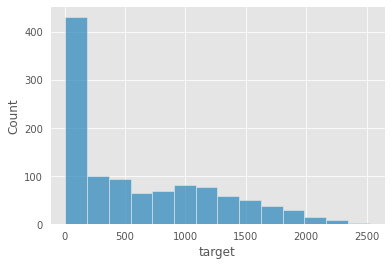

In [ ]:
sns.histplot(train['target'])

In [ ]:
Target = train['target']
target = []
for i in range(len(Target)):
  if Target.iloc[i] < 250:
    target.append(1)
  elif Target.iloc[i] < 1000:
    target.append(2)
  elif Target.iloc[i] < 1800:
    target.append(3)
  else:
    target.append(4)

train['Range'] = target

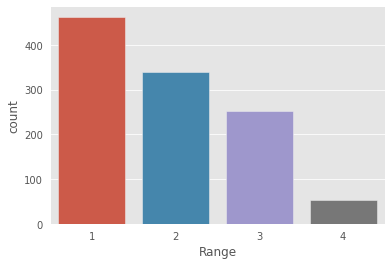

In [ ]:
sns.countplot(x = train["Range"])

## 데이터 전처리

Year_Birth를 이용해 나이 Age 계산

In [ ]:
train['Age'] = 2022 - train['Year_Birth']
test['Age'] = 2022 - train['Year_Birth']

In [ ]:
train = train.drop(['Year_Birth'], axis=1)
test = test.drop(['Year_Birth'], axis=1)

Education
```
학사 = 0, [Basic, Graduation]
석사 = 1, [2n Cycle, Master]
박사 = 2, [PhD]
```

In [ ]:
train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

In [ ]:
#train set 및 test set에 적용
for data in [train, test]:
  for i in range(data.shape[0]):
    education = data['Education'].iloc[i]
    if education in ["Basic", "Graduation"]:
      data['Education'].iloc[i] = 0
    elif education in ["2n Cycle", "Master"]:
      data['Education'].iloc[i] = 1
    else:
      data['Education'].iloc[i] = 2
  data['Education'] = data['Education'].astype(int)

Marital_Status
```
결혼, 동거 = 0, [Married, Together]
싱글 = 1, [Single, Divorced, Widow, Alone, YOLO, Absurd]
```

In [ ]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [ ]:
#train set 및 test set에 적용
for data in [train, test]:
  for i in range(data.shape[0]):
    marital_status = data['Marital_Status'].iloc[i]
    if marital_status in ["Married", "Together"]:
      data['Marital_Status'].iloc[i] = 0
    else:
      data['Marital_Status'].iloc[i] = 1
  data['Marital_Status'] = data['Marital_Status'].astype(int)

Dt_Customer를 회사 가입 개월수인 Sign_month로 변환
- sign_month = 사이트에 가입하고 몇 개월이나 지났는가? 높을수록 예전에 가입한사람

In [ ]:
print(max(pd.to_datetime(train['Dt_Customer'])))
print(max(pd.to_datetime(test['Dt_Customer'])))

recent_year = 2014
recent_month = 12
recent_day = 5

2014-12-05 00:00:00
2014-12-06 00:00:00


In [ ]:
train['year'] = (train['year']).astype(int)
train['month']= (train['month']).astype(int)
train['day'] = (train['day']).astype(int)

test['year'] = (test['year']).astype(int)
test['month']= (test['month']).astype(int)
test['day'] = (test['day']).astype(int)

In [ ]:
for data in [train, test]:
  for i in range(data.shape[0]):
    if ((recent_year - data['year'].iloc[i]) == 0):
      data['Dt_Customer'].iloc[i] = recent_month - data['month'].iloc[i]
    elif ((recent_year - data['year'].iloc[i]) == 1):
      data['Dt_Customer'].iloc[i] = recent_month + (12 - data['month'].iloc[i])
    else:
      data['Dt_Customer'].iloc[i] = ((recent_year - data['year'].iloc[i]) -1) * 12 + recent_month + (12 - data['month'].iloc[i])
  data['Dt_Customer'] = data['Dt_Customer'].astype(int)

In [ ]:
train['Sign_month'] = train['Dt_Customer']
test['Sign_month'] = train['Dt_Customer']

In [ ]:
# train = train.drop(['Dt_Customer'], axis=1)
# test = test.drop(['Dt_Customer'], axis=1)

In [ ]:
train = train.drop(['Dt_Customer', 'year', 'month', 'day'], axis=1)
test = test.drop(['Dt_Customer', 'year', 'month', 'day'], axis=1)

## EDA

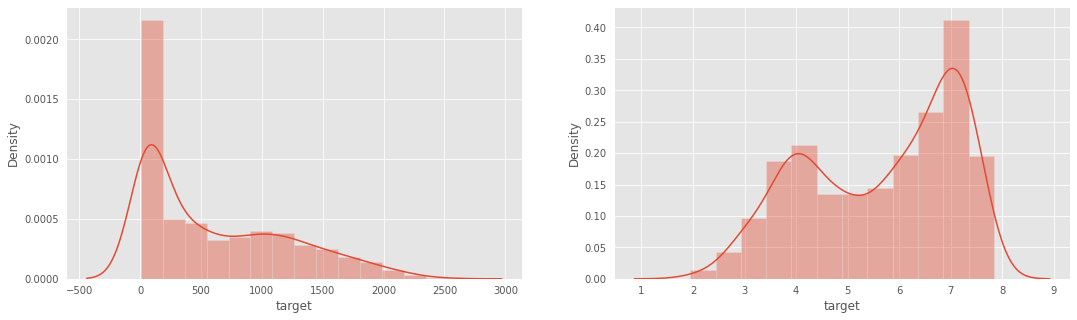

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.distplot(train['target'], ax=ax[0])  # 원본 데이터 target
sns.distplot(np.log1p(train['target']), ax=ax[1])  # log 변환한 target
plt.show()

In [ ]:
train_cat = train[['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Sign_month', 'year', 'month', 'day', 'Range']]
train_num = train[['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Sign_month', 'year', 'month', 'day', 'Range']]

### 범주형 변수

In [ ]:
train_cat.head()

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Sign_month,year,month,day,Range
0,1,0,0,0,0,0,0,0,0,23,2013,1,21,2
1,0,1,0,0,1,0,0,0,0,7,2014,5,24,2
2,0,0,0,0,0,0,0,0,0,16,2013,8,4,2
3,0,0,0,0,0,0,0,0,0,9,2014,3,29,1
4,2,0,1,0,0,0,0,0,0,2,2014,10,6,2


- `Education` : 학사 > 석사 > 박사 순으로 소비량이 적은 쪽이 많음
- `Marital_Status` : 결혼 > 싱글 순으로 소비량이 적은 쪽이 많음

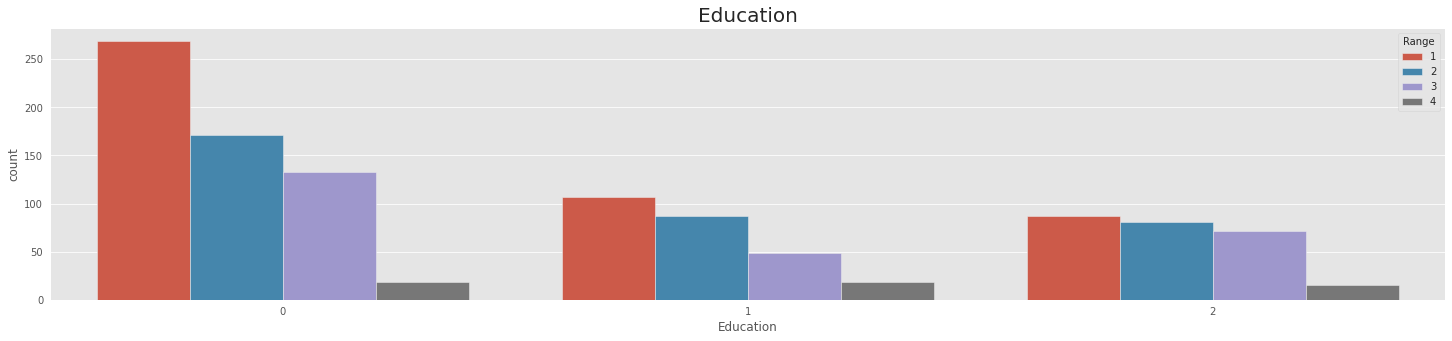

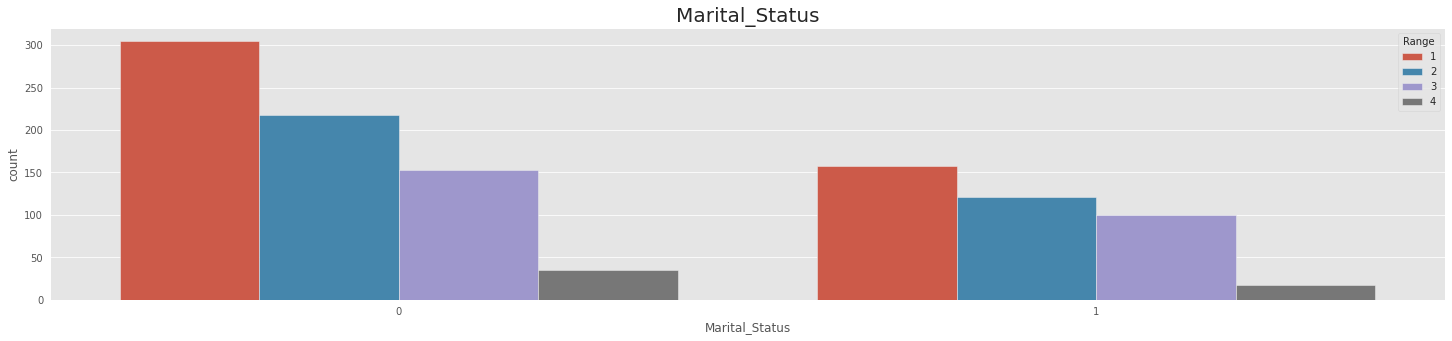

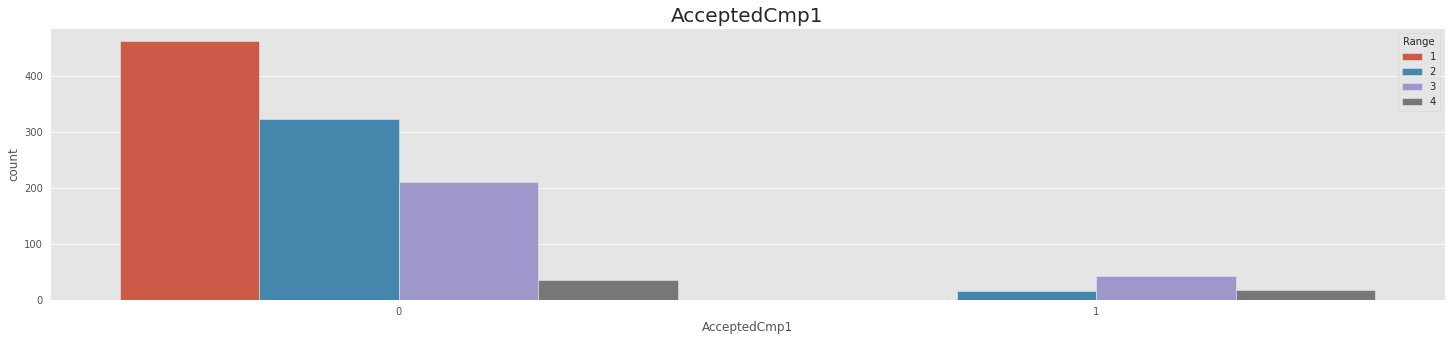

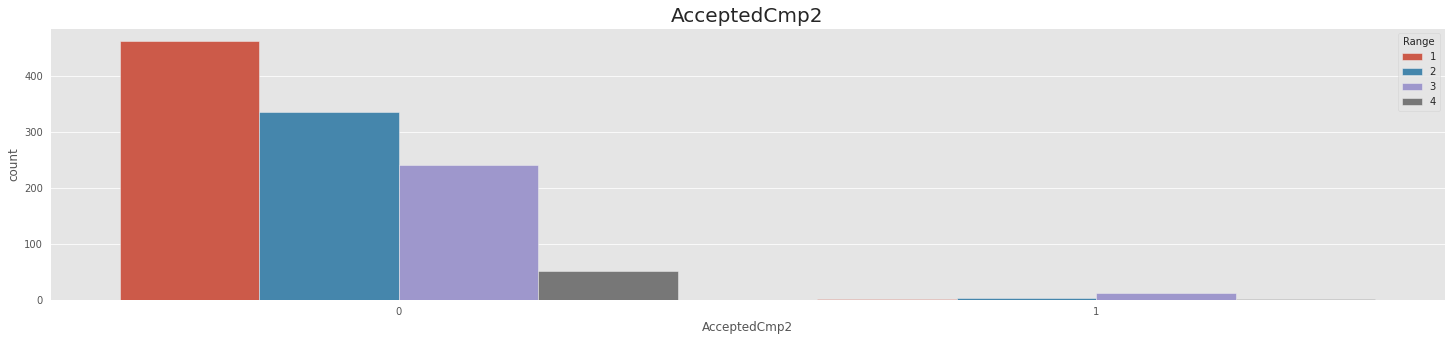

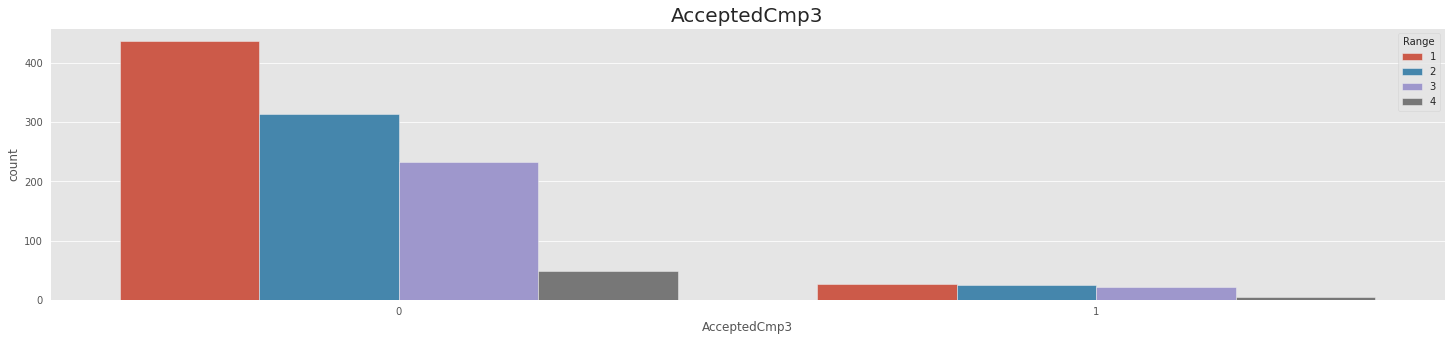

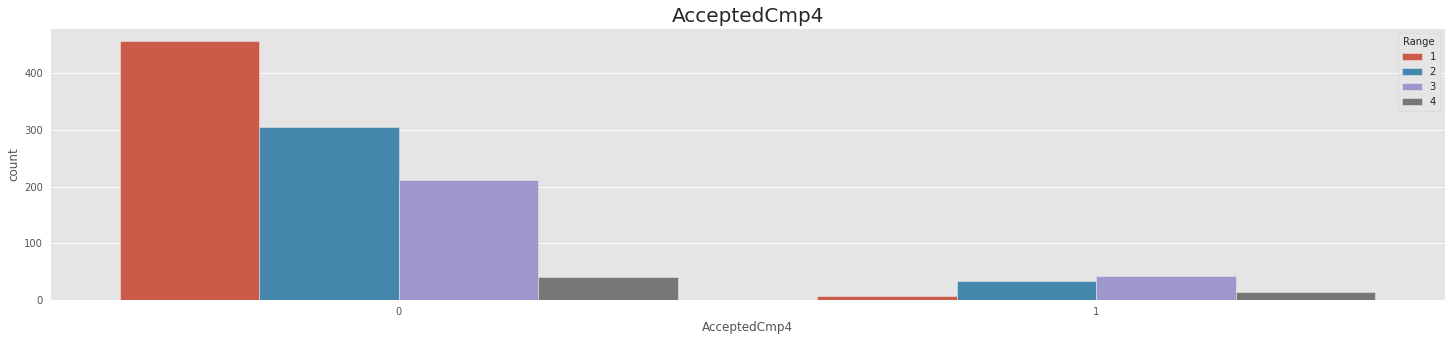

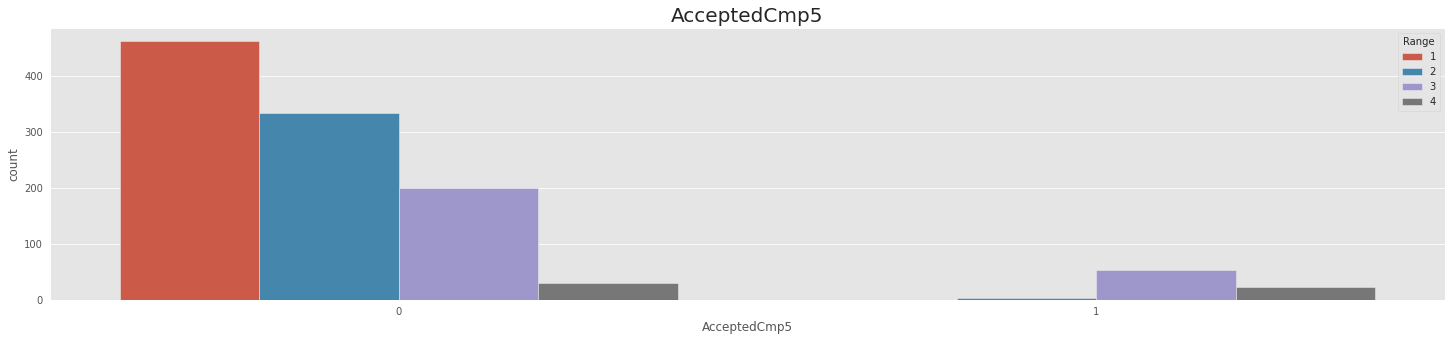

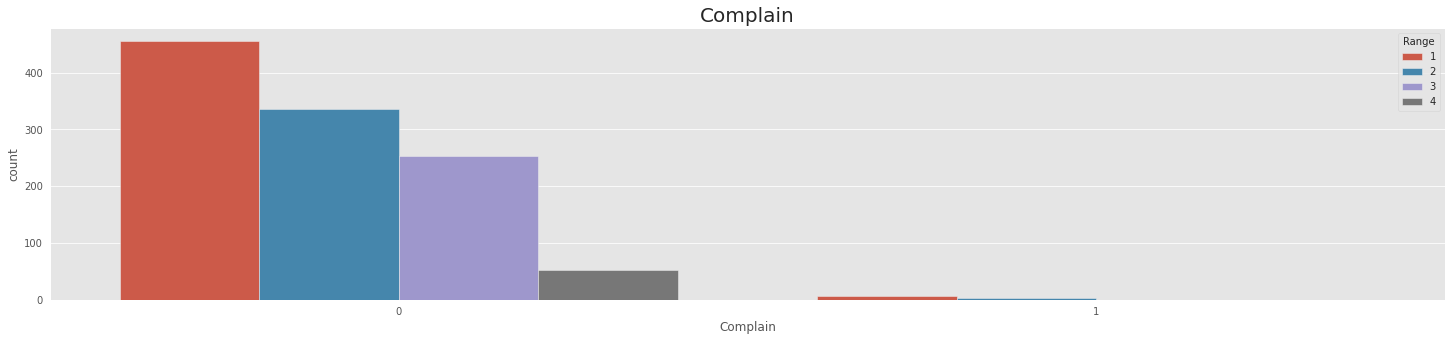

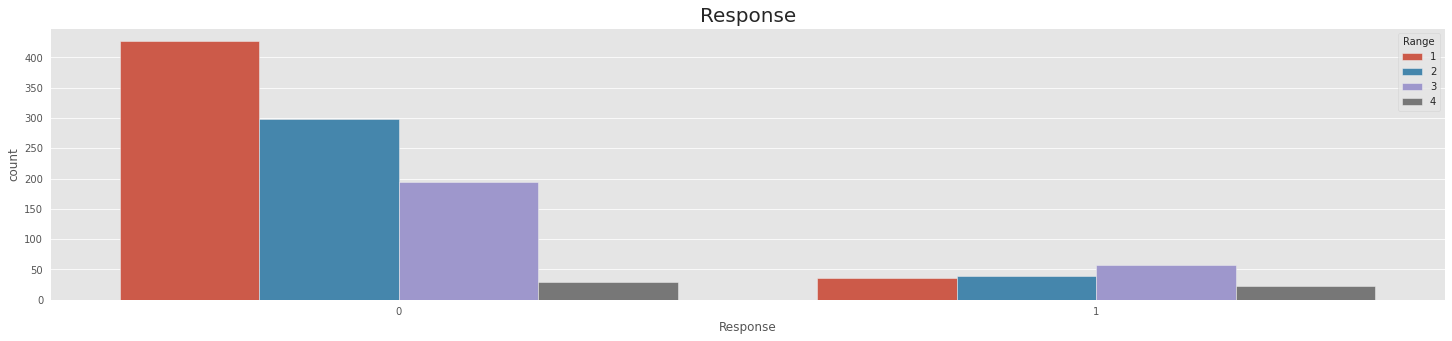

In [ ]:
columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

def cat_plot(df, columns):
  for col in columns:
    plt.figure(figsize=(25, 5))
    sns.countplot(x=col, hue='Range', data=df)
    plt.title(col, fontsize=20)
    plt.show()

cat_plot(train, columns)

### 연속형 변수

In [ ]:
train_num.head()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Sign_month,year,month,day,Range
0,46014.0,1,1,21,10,7,1,8,7,23,2013,1,21,2
1,76624.0,0,1,68,1,5,10,7,1,7,2014,5,24,2
2,75903.0,0,1,50,2,6,6,9,3,16,2013,8,4,2
3,18393.0,1,0,2,2,3,0,3,8,9,2014,3,29,1
4,64014.0,2,1,56,7,8,2,5,7,2,2014,10,6,2


```
오른쪽으로 긴 꼬리 : 최반값 < 중위수 < 평균
왼쪽으로 긴 꼬리 : 평균 < 중위수 < 최빈값
정규분포 : 평균 = 중위수 = 최빈값
```

Income 평균 : 52075.809566787
Income 중위수 : 51609.5
Income 최빈값 : 7500.0



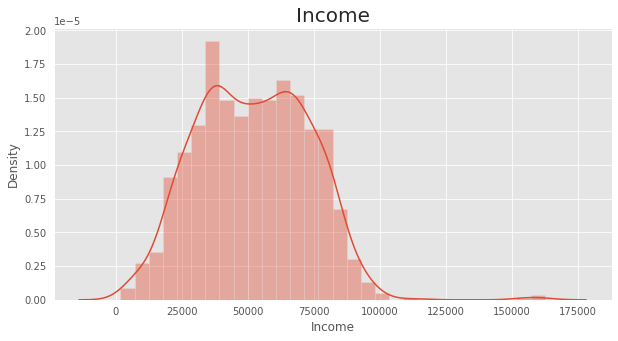

Kidhome 평균 : 0.4296028880866426
Kidhome 중위수 : 0.0
Kidhome 최빈값 : 0



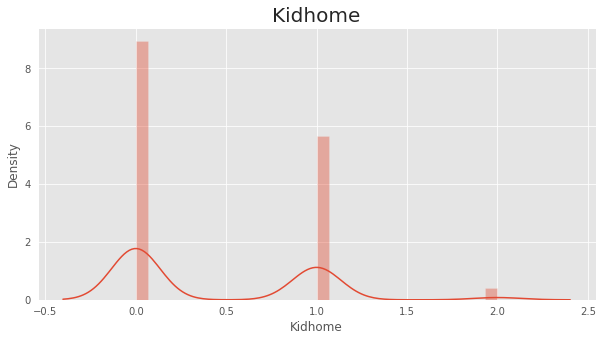

Teenhome 평균 : 0.5117328519855595
Teenhome 중위수 : 0.0
Teenhome 최빈값 : 0



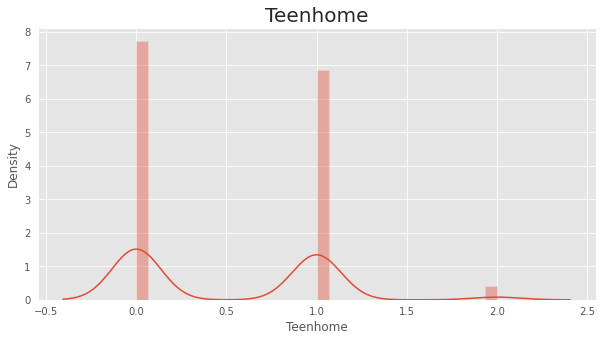

Recency 평균 : 50.15613718411552
Recency 중위수 : 51.0
Recency 최빈값 : 56



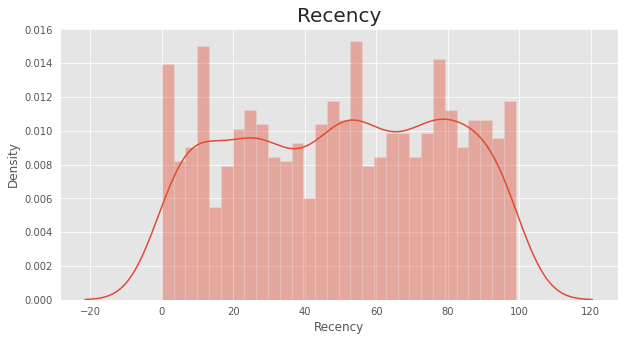

NumDealsPurchases 평균 : 2.339350180505415
NumDealsPurchases 중위수 : 2.0
NumDealsPurchases 최빈값 : 1



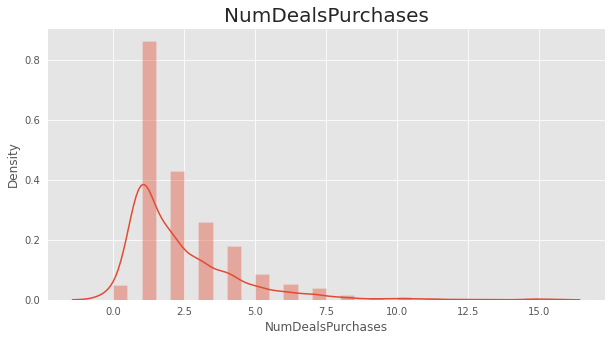

NumWebPurchases 평균 : 4.184115523465704
NumWebPurchases 중위수 : 4.0
NumWebPurchases 최빈값 : 3



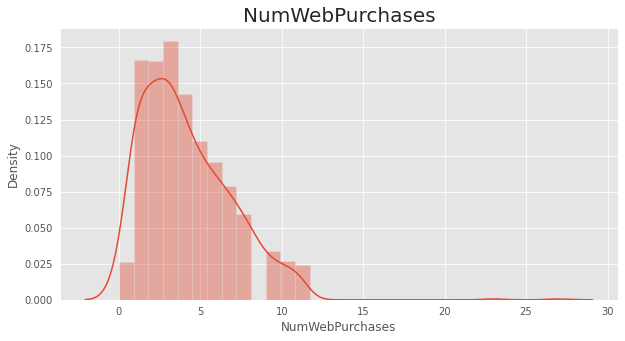

NumCatalogPurchases 평균 : 2.69043321299639
NumCatalogPurchases 중위수 : 2.0
NumCatalogPurchases 최빈값 : 0



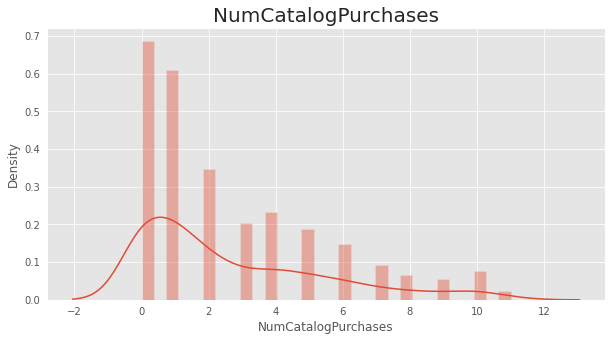

NumStorePurchases 평균 : 5.905234657039712
NumStorePurchases 중위수 : 5.0
NumStorePurchases 최빈값 : 3



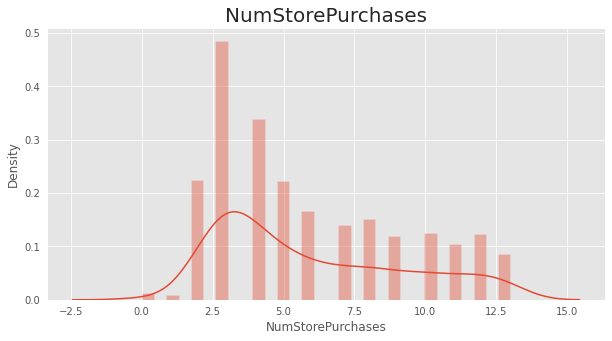

NumWebVisitsMonth 평균 : 5.3483754512635375
NumWebVisitsMonth 중위수 : 6.0
NumWebVisitsMonth 최빈값 : 7



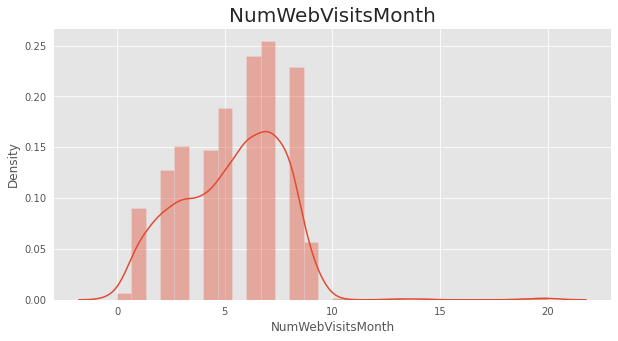

Sign_month 평균 : 17.481046931407942
Sign_month 중위수 : 18.0
Sign_month 최빈값 : 22



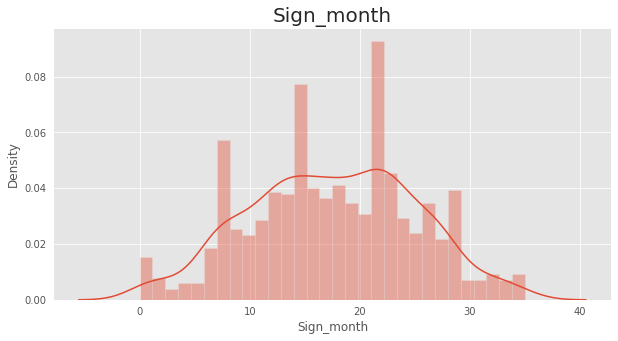

In [ ]:
num_col = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Sign_month']

def num_plot(df, columns):
  for col in columns:
    print("{} 평균 : {}".format(col, df[col].mean()))
    print("{} 중위수 : {}".format(col, df[col].median()))
  
    mode = df[col].value_counts().index[0]
    print("{} 최빈값 : {}\n".format(col, mode))
  
    plt.figure(figsize=(10, 5))
    sns.distplot(df[col], bins=30)
    plt.title(col, fontsize=20)
    plt.show()
    print("=" * 90)
  
num_plot(train, num_col)

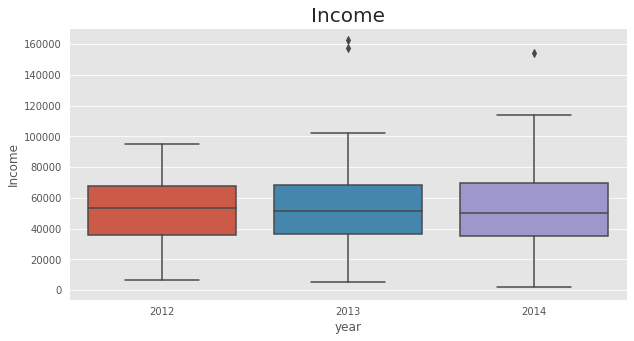

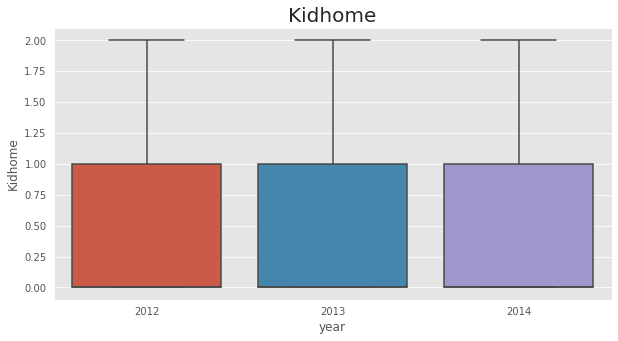

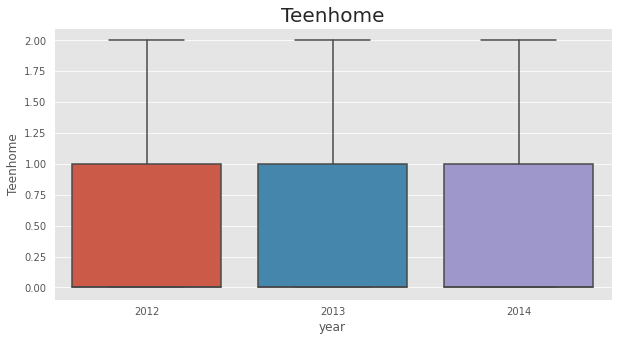

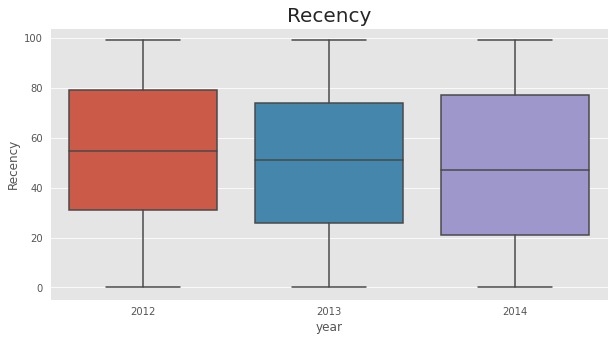

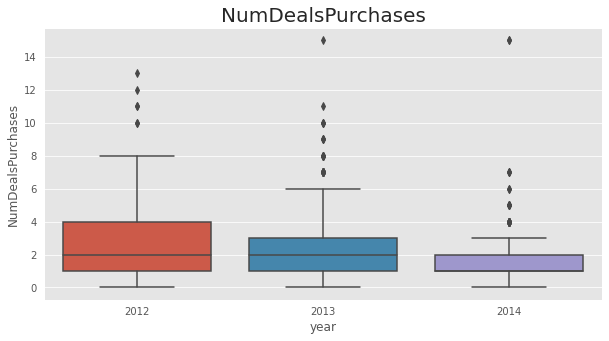

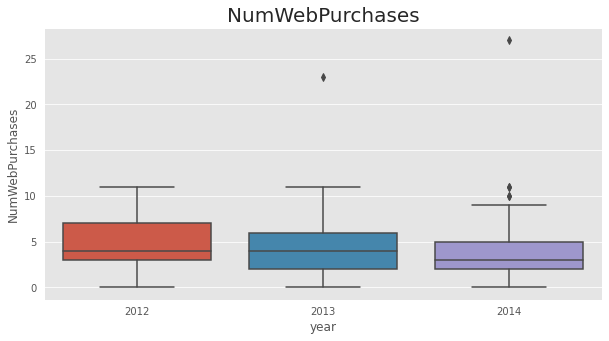

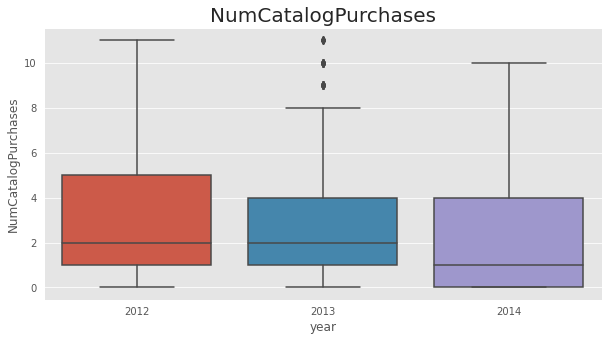

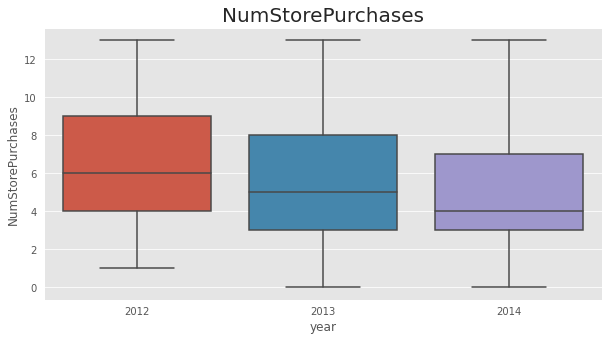

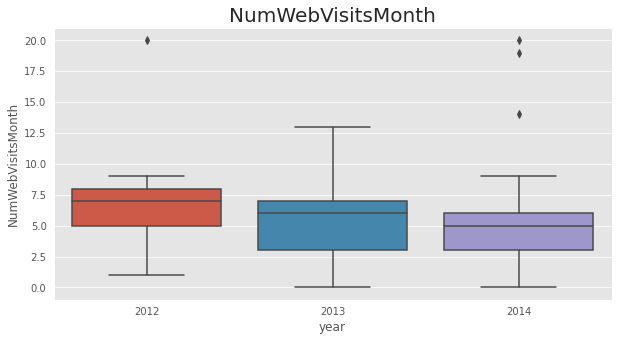

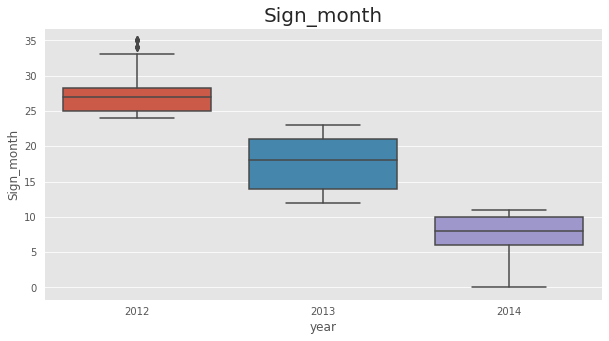

In [ ]:
num_col = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Sign_month']

def num_plot(df, columns):
  for col in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='year', y=col, data=train)
    plt.title(col, fontsize=20)
    plt.show()
  
num_plot(train, num_col)

### 상관관계

### 상관관계
- 양의 상관관계
```
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
AcceptedCmp5           0.458208
AcceptedCmp1           0.361102
```

- 음의 상관관계
```
NumWebVisitsMonth     -0.488252
Kidhome               -0.538365
```

In [ ]:
abs(train.corr()['target']).sort_values(ascending=False)

target                 1.000000
Range                  0.954404
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
Kidhome                0.538365
NumWebVisitsMonth      0.488252
AcceptedCmp5           0.458208
AcceptedCmp1           0.361102
AcceptedCmp4           0.256784
Response               0.242760
year                   0.159404
Age                    0.136035
AcceptedCmp2           0.129995
Teenhome               0.109214
NumDealsPurchases      0.072802
Complain               0.058704
Recency                0.050873
AcceptedCmp3           0.040736
day                    0.027491
month                  0.015810
Name: target, dtype: float64

In [ ]:
train.corr()['target'].sort_values(ascending=False)

target                 1.000000
Range                  0.954404
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
AcceptedCmp5           0.458208
AcceptedCmp1           0.361102
AcceptedCmp4           0.256784
Response               0.242760
Age                    0.136035
AcceptedCmp2           0.129995
Recency                0.050873
AcceptedCmp3           0.040736
day                    0.027491
month                  0.015810
Complain              -0.058704
NumDealsPurchases     -0.072802
Teenhome              -0.109214
year                  -0.159404
NumWebVisitsMonth     -0.488252
Kidhome               -0.538365
Name: target, dtype: float64

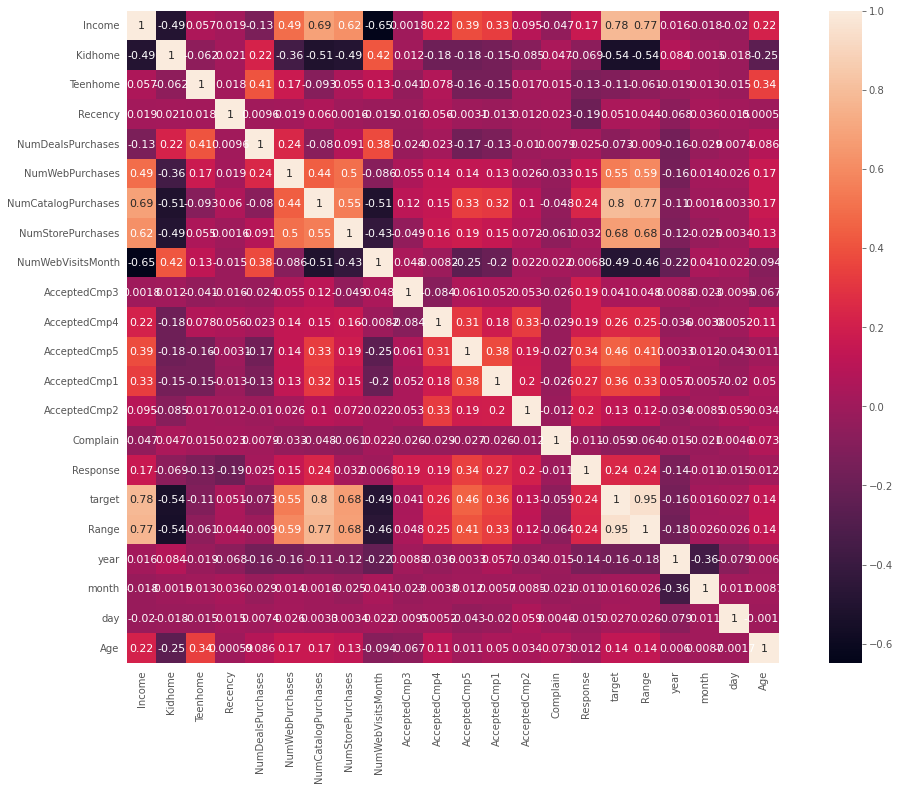

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(train.corr(), annot=True, annot_kws={'size' : 11}, square=True)

### 상관계수가 높게 나타난 변수들과 target과의 관계

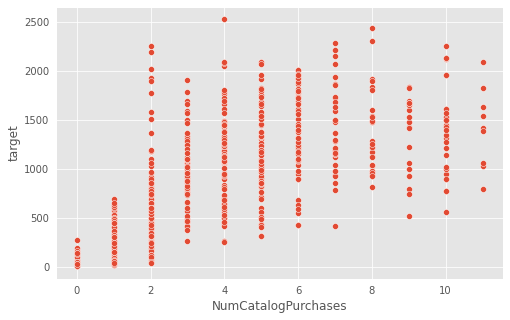

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumCatalogPurchases', y='target', data=train)

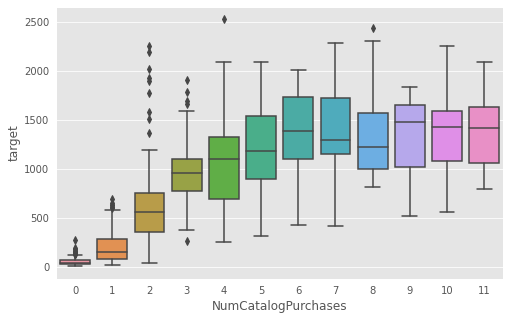

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumCatalogPurchases', y='target', data=train)

Income
- 소득이 120000 ~ 160000인 경우 소비량이 거의 없거나 적음
- 소득이 0 ~ 60000인 경우 소비량이 적은 쪽이 많이 분포되어 있음
- 소득이 60000 ~ 110000인 경우 소비량이 많은 쪽이 많이 분포되어 있음

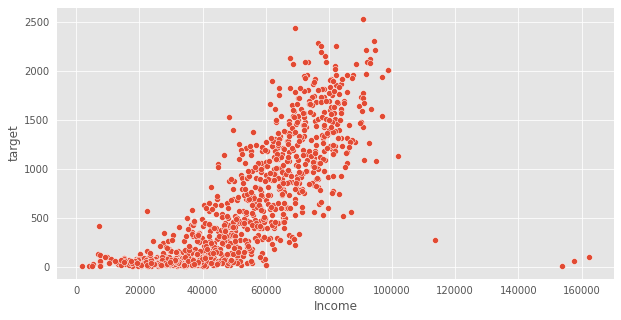

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Income', y='target', data=train)

NumStorePurchases
- 매장에서 직접 구매한 횟수가 많을수록 소비량이 많음 (9~13회)
- 매장에서 직접 구매한 횟수가 적을수록 소비량이 적음 (0~9회)

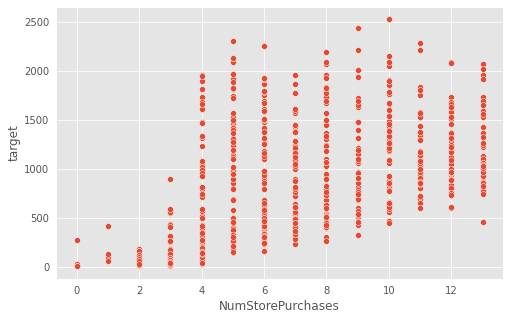

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumStorePurchases', y='target', data=train)

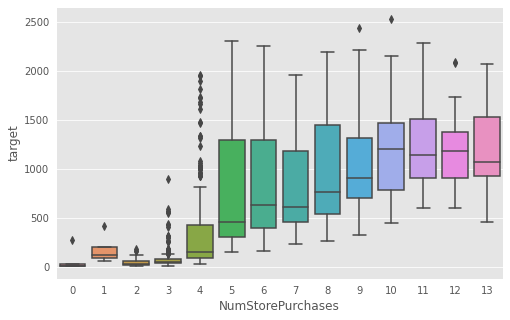

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumStorePurchases', y='target', data=train)

NumWebPurchases
- 웹 사이트를 통해 구매한 건수가 많을수록 소비량이 적음 (23~27회)
- 웹 사이트를 통해 구매한 건수가 적을수록 소비량이 적음이 많이 분포되어 있음 (0~8회)
- 웹 사이트를 통해 구매한 건수가 9~11회인 경우 소비량이 많음

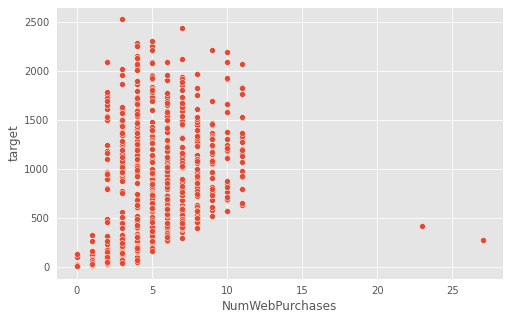

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumWebPurchases', y='target', data=train)

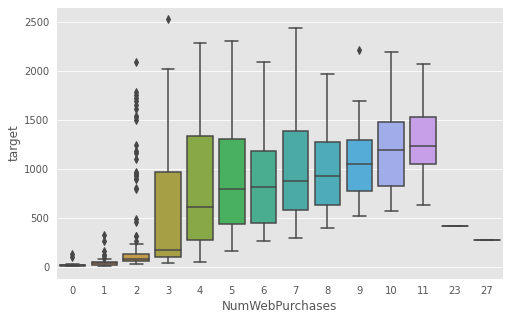

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumWebPurchases', y='target', data=train)

AcceptedCmp5
- 고객이 5번째 캠페인에서 제안을 수락한 경우 1이 소비량이 많음

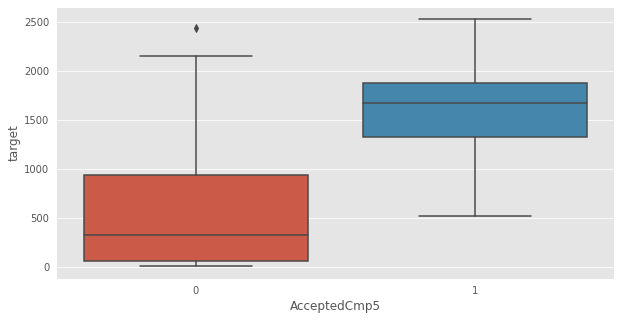

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='AcceptedCmp5', y='target', data=train)

AcceptedCmp1
- 고객이 1번째 캠페인에서 제안을 수락한 경우 1이 소비량이 많음

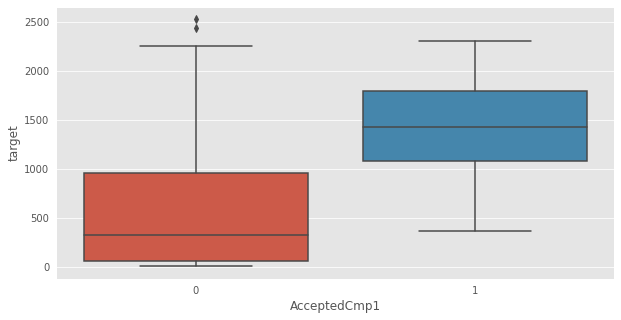

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='AcceptedCmp1', y='target', data=train)

NumWebVisitsMonth
- 지난 달 회사 웹사이트 방문 횟수가 적을수록 소비량이 많음 (0~4회)
- 지난 달 회사 웹사이트 방문 횟수가 많을수록 소비량이 적음 (5~20회)

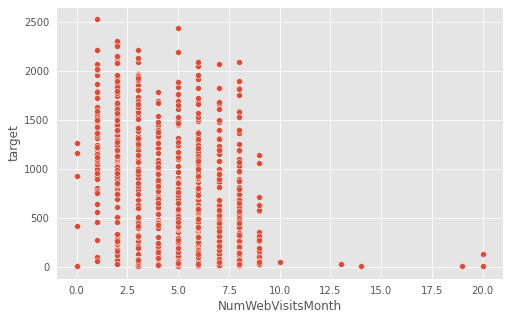

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumWebVisitsMonth', y='target', data=train)

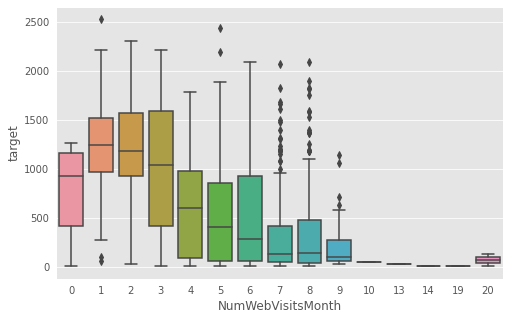

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumWebVisitsMonth', y='target', data=train)

Kidhome
- 고객 가구의 자녀 수가 적을수록 소비량이 많음 (0명)
- 고객 가구의 자녀 수가 많을수록 소비량이 적음 (1명 > 2명)

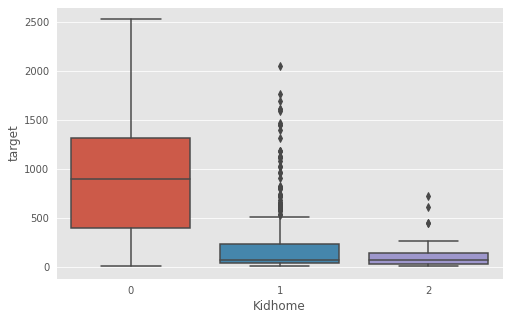

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Kidhome', y='target', data=train)

In [ ]:
train = train.drop(['year', 'month', 'day'], axis=1)
test = test.drop(['year', 'month', 'day'], axis=1)

## Scailing

In [ ]:
target = train['target']
train_Range = train['Range']

In [ ]:
col = ["Income", "NumDealsPurchases", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

for data in [train, test]:
    data[col] = np.log1p(data[col])

In [ ]:
train_cat = train[['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']]
train_num = train.drop(['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'target', 'Range'], axis=1)

test_cat = test[['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']]
test_num = test.drop(['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1)

In [ ]:
scaler = StandardScaler()
train_num[:] = scaler.fit_transform(train_num[:])
test_num[:] = scaler.fit_transform(test_num[:])

In [ ]:
train_num = round(train_num, 4) 
test_num = round(test_num, 4)

In [ ]:
train = pd.concat([train_cat, train_num, train_Range, target], axis=1)
train.head()

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Income,...,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Sign_month,Range,target
0,1,0,0,0,0,0,0,0,0,-0.0367,...,-1.0029,2.7488,1.0318,-0.6057,0.7796,0.7050,-0.4336,0.7367,2,541
1,0,1,0,0,1,0,0,0,0,0.9735,...,0.6138,-0.8056,0.5226,2.6190,0.5384,-2.3511,0.5484,-1.3992,2,899
2,0,0,0,0,0,0,0,0,0,0.9548,...,-0.0054,0.0398,0.7955,1.1858,0.9954,-0.8230,1.4486,-0.1977,2,901
3,0,0,0,0,0,0,0,0,0,-1.8533,...,-1.6564,0.0398,-0.1950,-0.9640,-0.8813,0.9646,-0.4336,-1.1322,1,50
4,2,0,1,0,0,0,0,0,0,0.6173,...,0.2010,2.0848,1.2403,-0.2474,-0.0509,0.7050,1.8577,-2.0666,2,444


In [ ]:
test = pd.concat([test_cat, test_num], axis=1)
test.head()

,Education,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Sign_month
0,0,1,0,0,0,0,0,0,0,0.4102,1.0345,-0.9302,1.2213,1.1562,0.2672,0.1140,0.8482,-0.2826,-0.4336,0.7367
1,0,0,0,0,0,0,0,1,0,0.6734,-0.8601,0.9335,0.3522,0.0446,-0.6538,0.4414,1.2651,-2.2188,0.5484,-1.3992
2,0,0,0,0,0,0,0,0,0,0.3367,1.0345,-0.9302,-0.9341,0.6706,0.5959,0.1140,1.7662,-0.2826,1.4486,-0.1977
3,0,0,0,0,0,1,0,0,0,0.7316,-0.8601,0.9335,-1.3860,1.1562,1.1145,0.4414,1.7662,0.1027,-0.4336,-1.1322
4,0,0,1,0,0,0,0,0,0,1.1943,-0.8601,0.9335,1.4299,0.0446,0.8738,1.4233,1.0671,-0.7541,1.8577,-2.0666


## Modeling

### 파라미터 튜닝

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
X = train.drop(["target"], axis = 1)
y = train["target"]

Range = X['Range']
X = X.drop(['Range'], axis=1)

In [ ]:
from bayes_opt import BayesianOptimization

param_bounds = {
    'n_estimators' : (100, 300),
    'learning_rate' : (0.01, 0.2)
}

def model(n_estimators, learning_rate):
    params = {
        'n_estimators' : int(round(n_estimators)),
        'learning_rate' : learning_rate
    }

    model = LGBMRegressor(random_state=25)
    score = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    return score.mean()

BO = BayesianOptimization(f=model, pbounds=param_bounds, random_state=25)
BO.maximize(init_points=10, n_iter=10)
max_params = BO.max['params']
print(max_params)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        | -114.7    |  0.1753   |  216.5    |
|  2        | -115.8    |  0.06298  |  137.2    |
|  3        | -114.4    |  0.08811  |  123.5    |
|  4        | -118.4    |  0.1401   |  187.5    |
|  5        | -114.2    |  0.1157   |  173.4    |
|  6        | -116.7    |  0.08645  |  122.6    |
|  7        | -116.1    |  0.09494  |  217.1    |
|  8        | -119.4    |  0.04078  |  204.1    |
|  9        | -117.0    |  0.07195  |  239.8    |
|  10       | -114.1    |  0.07961  |  267.3    |
|  11       | -114.7    |  0.1833   |  173.3    |
|  12       | -117.5    |  0.1315   |  174.2    |
|  13       | -112.7    |  0.109    |  173.4    |
|  14       | -115.4    |  0.1384   |  173.5    |
|  15       | -114.9    |  0.07736  |  173.5    |
|  16       | -114.1    |  0.1101   |  222.6    |
|  17       | -115.2    |  0.06555  |  130.9    |
|  18       | -117.5    |  0.1107   |  240.1    |


In [ ]:
from bayes_opt import BayesianOptimization

param_bounds = {
    'n_estimators' : (100, 300),
    'learning_rate' : (0.01, 0.2)
}

def model(n_estimators, learning_rate):
    params = {
        'n_estimators' : int(round(n_estimators)),
        'learning_rate' : learning_rate
    }

    model = GradientBoostingRegressor(random_state=25)
    score = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    return score.mean()

BO = BayesianOptimization(f=model, pbounds=param_bounds, random_state=25)
BO.maximize(init_points=10, n_iter=10)
max_params = BO.max['params']
print(max_params)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        | -121.3    |  0.1753   |  216.5    |
|  2        | -122.3    |  0.06298  |  137.2    |
|  3        | -121.3    |  0.08811  |  123.5    |
|  4        | -122.1    |  0.1401   |  187.5    |
|  5        | -122.8    |  0.1157   |  173.4    |
|  6        | -120.4    |  0.08645  |  122.6    |
|  7        | -122.0    |  0.09494  |  217.1    |
|  8        | -122.4    |  0.04078  |  204.1    |
|  9        | -123.0    |  0.07195  |  239.8    |
|  10       | -121.6    |  0.07961  |  267.3    |
|  11       | -122.1    |  0.1168   |  122.0    |
|  12       | -122.8    |  0.1581   |  135.9    |
|  13       | -120.9    |  0.178    |  271.2    |
|  14       | -122.1    |  0.1976   |  195.6    |
|  15       | -123.7    |  0.01263  |  220.2    |
|  16       | -121.1    |  0.1101   |  222.6    |
|  17       | -121.9    |  0.06555  |  130.9    |
|  18       | -123.0    |  0.1107   |  240.1    |


In [ ]:
from bayes_opt import BayesianOptimization

param_bounds = {
    'n_estimators' : (100, 300),
    'max_depth' : (1, 3),
    'max_leaf_nodes' : (1, 3)
}

def model(n_estimators, max_depth, max_leaf_nodes):
    params = {
        'n_estimators' : int(round(n_estimators)),
        'max_dqpth' : int(round(max_depth)),
        'max_leaf_nodes' : int(round(max_leaf_nodes))
    }

    model = RandomForestRegressor(random_state=25)
    score = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
    return score.mean()

BO = BayesianOptimization(f=model, pbounds=param_bounds, random_state=25)
BO.maximize(init_points=10, n_iter=10)
max_params = BO.max['params']
print(max_params)

|   iter    |  target   | max_depth | max_le... | n_esti... |
-------------------------------------------------------------
|  1        | -111.8    |  2.74     |  2.165    |  155.8    |
|  2        | -111.0    |  1.372    |  1.822    |  123.5    |
|  3        | -111.2    |  2.37     |  1.875    |  211.2    |
|  4        | -112.3    |  1.734    |  1.805    |  122.6    |
|  5        | -112.5    |  1.894    |  2.171    |  132.4    |
|  6        | -110.0    |  2.041    |  1.652    |  239.8    |
|  7        | -111.0    |  1.733    |  2.673    |  196.3    |
|  8        | -113.8    |  2.033    |  1.766    |  299.5    |
|  9        | -110.8    |  2.028    |  2.118    |  106.9    |
|  10       | -111.0    |  2.44     |  1.842    |  187.4    |
|  11       | -111.0    |  1.649    |  2.589    |  261.2    |
|  12       | -112.3    |  2.548    |  2.239    |  209.1    |
|  13       | -113.7    |  2.386    |  2.396    |  199.3    |
|  14       | -111.9    |  1.544    |  1.229    |  109.2    |
|  15   

### KFold

In [ ]:
X = train.drop(["target"], axis = 1)
y = train["target"]

In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

In [ ]:
skf = StratifiedKFold(n_splits = 10, random_state = 25, shuffle = True)
n = 0

fold_target_pred = []
fold_score = []

In [ ]:
Range = X['Range']
X = X.drop(['Range'], axis=1)

train_X = np.array(X)
train_y = np.array(y)

In [ ]:
for train_index, valid_index in skf.split(X, Range):
    n += 1
    
    val_pred_name = [] 
    val_pred = []      
    target_pred = []  
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_y[train_index], train_y[valid_index]
    
    X_test = np.array(test)

    ### Create Model ###
  
    ### LGBMRegressor ###
    model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=25, verbose = 0) 
    model.fit(X_train, y_train) # 모델 학습
    
    val_pred_name.append("LGBMRegressor")     
    val_pred.append(model.predict(X_valid))   
    target_pred.append(model.predict(X_test)) 
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(random_state=25) 
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")     
    val_pred.append(model.predict(X_valid))   
    target_pred.append(model.predict(X_test))
    
    ### GradientBoostingRegressor ###
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=25) 
    model.fit(X_train, y_train)
    
    val_pred_name.append("GradientBoostingRegressor")   
    val_pred.append(model.predict(X_valid))   
    target_pred.append(model.predict(X_test)) 
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")
    
    fold_score.append(NMAE(y_valid, preds.astype(int)))

total_score = fold_score[0]
for i in range(2, len(fold_score), 1):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score))    

print("==============================")
print("Total Average NMAE %0.4f" %(total_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
53:	learn: 223.4675238	total: 91.8ms	remaining: 1.61s
54:	learn: 221.5031587	total: 94ms	remaining: 1.61s
55:	learn: 219.9284397	total: 96ms	remaining: 1.62s
56:	learn: 218.2200997	total: 98.1ms	remaining: 1.62s
57:	learn: 216.5076606	total: 101ms	remaining: 1.64s
58:	learn: 215.1070509	total: 103ms	remaining: 1.65s
59:	learn: 213.4511493	total: 105ms	remaining: 1.65s
60:	learn: 212.8283619	total: 106ms	remaining: 1.64s
61:	learn: 211.2823101	total: 108ms	remaining: 1.64s
62:	learn: 210.0870528	total: 110ms	remaining: 1.63s
63:	learn: 208.8628599	total: 111ms	remaining: 1.62s
64:	learn: 207.7093568	total: 113ms	remaining: 1.62s
65:	learn: 206.3902381	total: 114ms	remaining: 1.61s
66:	learn: 205.0511164	total: 116ms	remaining: 1.61s
67:	learn: 204.0087959	total: 117ms	remaining: 1.6s
68:	learn: 202.6497204	total: 118ms	remaining: 1.6s
69:	learn: 201.8152131	total: 120ms	remaining: 1.59s
70:	learn: 200.6676007	total: 121ms	remaining: 1.59s
71:	learn: 1

In [ ]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])

for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [ ]:
sample_submission['target'] = final_pred

In [ ]:
sample_submission.to_csv("KFold-LGBM+CB+Grad.csv",index=False)  # NMAE = 0.190826